# 第9章 教師あり学習の総合演習

# 練習9-1 
どのような機械学習手法を用いると良いか？

### 解答例
教師あり学習の分類

# 練習9-2
どのようなアウトプットを得られるか？また、その分析結果からどのようにスッキリ銀行の課題を解決する事が出来るか？

### 解答例
ｙ列を予測する分類モデルを作ることにより、その顧客が購入してくれるかどうかが事前に分かる。また、特徴量にこちらからのアプローチ法を入れる事により、「この顧客の場合、こういうアプローチをとったら購入してくれる」というような営業の最適化を行う事が出来る

# 練習9-3 
ひとまず何でもいいのでモデルを作ってみましょう。ただし、データは訓練、検証、テストデータの3分割をする方法を利用すること

In [1]:
import polars as pl
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [ ]:
data_path_local = '../datafiles/Bank.csv'
data_path_colab = 'https://raw.githubusercontent.com/utm529f/sukkiri-ml-codes-polars/main/datafiles/Bank.csv'

df = pl.read_csv(data_path_colab)
print("Bank.csvのデータ行列数", df.shape)
df.head()

Bank.csvのデータ行列数 (27128, 16)


id,age,job,marital,education,default,amount,housing,loan,contact,day,month,duration,campaign,previous,y
i64,i64,str,str,str,str,f64,str,str,str,i64,str,f64,i64,i64,i64
1,39,"""blue-collar""","""married""","""secondary""","""no""",1756.0,"""yes""","""no""","""cellular""",3,"""apr""",370.055237,1,0,1
2,51,"""entrepreneur""","""married""","""primary""","""no""",1443.0,"""no""","""no""","""cellular""",18,"""feb""",233.998933,10,0,1
3,36,"""management""","""single""","""tertiary""","""no""",436.0,"""no""","""no""","""cellular""",13,"""apr""",null,1,2,0
4,63,"""retired""","""married""","""secondary""","""no""",474.0,"""no""","""no""","""cellular""",25,"""jan""",252.525808,1,0,0
5,31,"""management""","""single""","""tertiary""","""no""",354.0,"""no""","""no""","""cellular""",30,"""apr""",null,1,2,0


In [3]:
# まず、ダミー変数化をしたいが、文字列の列が複数あるので抜き出す。
str_col_name = ['job', 'default', 'marital', 'education', 'housing', 'loan', 'contact', 'month']
str_df = df.select(pl.col(str_col_name))
# 複数列を一気にダミー変数化
str_df2 = str_df.to_dummies(drop_first=True)

num_df = df.drop(str_col_name) # 数値列を抜き出す
df2 = pl.concat([num_df, str_df2, str_df], how='horizontal') # 結合(今後の集計の利便性も考慮してstr_dfも結合しておく)

In [4]:
df2.columns

['id',
 'age',
 'amount',
 'day',
 'duration',
 'campaign',
 'previous',
 'y',
 'job_admin.',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'default_yes',
 'marital_divorced',
 'marital_single',
 'education_primary',
 'education_tertiary',
 'education_unknown',
 'housing_no',
 'loan_yes',
 'contact_sending _document',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'job',
 'default',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month']

In [5]:
#訓練&検証データとテストデータに分割
train_val, test = train_test_split(df2, test_size=0.1, random_state=9)
train_val.head()

id,age,amount,day,duration,campaign,previous,y,job_admin.,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,default_yes,marital_divorced,marital_single,education_primary,education_tertiary,education_unknown,housing_no,loan_yes,contact_sending _document,contact_telephone,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
i64,i64,f64,i64,f64,i64,i64,i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,str,str,str,str,str,str,str,str
13379,46,0.0,10,378.293875,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"""unemployed""","""no""","""married""","""tertiary""","""yes""","""no""","""cellular""","""jul"""
3801,41,-333.0,30,300.845752,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,"""blue-collar""","""no""","""divorced""","""secondary""","""yes""","""no""","""cellular""","""jan"""
10399,30,5389.0,6,159.053623,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"""management""","""no""","""single""","""tertiary""","""no""","""no""","""cellular""","""aug"""
23402,39,255.0,5,334.802583,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,"""management""","""no""","""single""","""tertiary""","""yes""","""no""","""sending _document""","""may"""
26224,47,33.0,5,null,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"""services""","""no""","""single""","""secondary""","""yes""","""no""","""cellular""","""may"""


## 欠損値の確認

In [6]:
a = train_val.null_count()
null_col_name = [
    col for col in a.columns 
    if a[col].ge(1).any()
]
print('欠損値のカウント')
a.select(pl.col(null_col_name))

欠損値のカウント


duration
u32
6331


In [7]:
print('durationの中央値:', train_val['duration'].median())

durationの中央値: 314.89135074820206


In [8]:
# とりあえず最初は中央値で補完
train_val2 = train_val.with_columns(
    pl.col(null_col_name).fill_null(pl.median(null_col_name))
)

In [9]:
# 不均衡なデータであるか確認
train_val2['y'].value_counts()

y,count
i64,u32
1,7814
0,16601


- 今回は不均衡データの分類。モデル作成時にclass_weight="balanced"と指定する事で、不均衡データに対応したモデルにする。
- class_weightを指定すると、通常より正解率は上がりにくい。

In [10]:
# とりあえず、全ての特徴量を利用してモデルを作ってみる。
t = train_val2['y']
x = train_val2.drop(str_col_name)
x = x.drop(['id','y','day'])

x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=13)

# 不均衡データに対応できるように、class_weight引数も設定
model = tree.DecisionTreeClassifier(random_state=3, max_depth=3, class_weight='balanced')

# class_weightを指定しないとちなみに正解率は0.7ぐらい
# model = tree.DecisionTreeClassifier(random_state=3, max_depth=5)
model.fit(x_train, y_train)
model.score(x_val, y_val)

0.6493958631988531

# 練習9-4　様々な検証をしてテストデータでの性能を高めましょう。ただし、テストデータを集計したり、図示したりはしてはいけません。

実はこのデータは、決定木では試行錯誤しても性能が高まりませんが、どういう着眼点で進めていくべきか、その一例を紹介します。(第3部で決定木以外の手法を紹介します)

In [11]:
# まず、さくっと学習できるようなlearn関数を定義する。
def learn(x, t, i):
    x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=13)

    datas = [x_train, x_val, y_train, y_val]

    # id 列は学習時は削除、datasには残す
    if 'id' in x.columns:
        x_train = x_train.drop('id')
        x_val = x_val.drop('id')

    # 不均衡データに対応できるように、class_weight引数も設定
    model = tree.DecisionTreeClassifier(random_state=i, max_depth=i, class_weight='balanced')
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    
    val_score = model.score(x_val, y_val)
    return train_score, val_score, model, datas

In [12]:
#とりあえず、for文で様々な木の深さでの正解率を調べてみる
print('max_depth, train_score, valid_score')
for i in range(1, 20):
    s1, s2, model, datas = learn(x, t, i)
    print(i, s1, s2)

max_depth, train_score, valid_score
1 0.6995187384804423 0.6993651443784559
2 0.6492422690968667 0.6493958631988531
3 0.6492422690968667 0.6493958631988531
4 0.7357669465492525 0.7481056727421667
5 0.7767765717796437 0.7771861560516076
6 0.80124923202949 0.8023755887773909
7 0.8224452181036248 0.8095433135367602
8 0.8448699569936514 0.8236739709195167
9 0.8587958222404259 0.8234691787835348
10 0.8770223223428221 0.8314560720868319
11 0.8987814867909072 0.8343231619905795
12 0.9096354699979521 0.8265410608232644
13 0.9285275445422896 0.8242883473274626
14 0.9421974196190867 0.8185541675199672
15 0.9559184927298792 0.8218308416956789
16 0.9679500307188204 0.8199877124718411
17 0.97670489453205 0.8195781281998771
18 0.9832582428834733 0.8146631169363097
19 0.9883780462830227 0.812205611304526


In [13]:
# 深さ11以降はvalが停滞するので過学習が発生ここでテストデータでチェック
model = tree.DecisionTreeClassifier(max_depth=11,random_state=11)
model.fit(x,t)
test2 = test.clone()
num_col_name = [col for col in test2.columns if col not in str_col_name]
test2 = test2.with_columns([
    pl.col(col).fill_null(train_val[col].median())
    for col in num_col_name
])

test_y = test2['y']
test_x = test2.drop(str_col_name)
test_x = test_x.drop(['id', 'y', 'day'])
print('test_score:', model.score(test_x, test_y))

test_score: 0.827865831183192


In [14]:
# 特徴量重要度の確認(ちなみに、連続量とダミー変数を比べると、連続量の方が重要度は高め出力されてしまう事に注意)
a = (
    pl.DataFrame(
        [x.columns, model.feature_importances_],
        schema=['column', 'feature_importances']
    )
    .sort(by='feature_importances', descending=True)
)
print('特徴量重要度 上位10件')
a.head(10) # campaignやdurationが重要度が大きいと分かる

特徴量重要度 上位10件


column,feature_importances
str,f64
"""duration""",0.528013
"""age""",0.14456
"""campaign""",0.102233
"""housing_no""",0.064873
"""loan_yes""",0.041694
"""amount""",0.040247
"""previous""",0.015638
"""contact_sending _document""",0.014421
"""education_primary""",0.003695


## durationの欠損値処理

In [15]:
# durationに関係がありそうなものを見つけるためには7章の様に集計処理で判断したい。
# よって、集計処理の軸になるstr_dfの列名をいったん確認
print('文字列型の列:', str_df.columns)

文字列型の列: ['job', 'default', 'marital', 'education', 'housing', 'loan', 'contact', 'month']


In [16]:
pl.Config.set_tbl_rows(-1) # print行の表示上限設定
print('各ラベル値ごとの y 平均値')
for name in str_df.columns:
    print(train_val.group_by(name).agg(pl.col('y').mean()))
    print("next=========")

各ラベル値ごとの y 平均値
shape: (12, 2)
┌───────────────┬──────────┐
│ job           ┆ y        │
│ ---           ┆ ---      │
│ str           ┆ f64      │
╞═══════════════╪══════════╡
│ unemployed    ┆ 0.241084 │
│ admin.        ┆ 0.30455  │
│ technician    ┆ 0.307423 │
│ housemaid     ┆ 0.290043 │
│ blue-collar   ┆ 0.352886 │
│ entrepreneur  ┆ 0.390453 │
│ services      ┆ 0.337611 │
│ management    ┆ 0.307299 │
│ self-employed ┆ 0.301974 │
│ unknown       ┆ 0.294118 │
│ retired       ┆ 0.369268 │
│ student       ┆ 0.166667 │
└───────────────┴──────────┘
next=========
shape: (2, 2)
┌─────────┬──────────┐
│ default ┆ y        │
│ ---     ┆ ---      │
│ str     ┆ f64      │
╞═════════╪══════════╡
│ yes     ┆ 0.249428 │
│ no      ┆ 0.321336 │
└─────────┴──────────┘
next=========
shape: (3, 2)
┌──────────┬──────────┐
│ marital  ┆ y        │
│ ---      ┆ ---      │
│ str      ┆ f64      │
╞══════════╪══════════╡
│ divorced ┆ 0.334059 │
│ married  ┆ 0.341211 │
│ single   ┆ 0.269086 │
└──────────┴────

- housing ,loan, contactが関係してそう。　ただ、contactにおいて、sending_documentは資料送付しかしていないのに接触時間が長いとはどういうことか？？
- 実際ならば、このデータはどう解釈すればいいのか実際の現場の人間に聞き取りをする必要があるが、今回は不可能なのでこのまま分析を進める。

In [17]:
print(train_val.pivot(index="housing", on="loan", values="duration", aggregate_function='mean'))
print(train_val.pivot(index="housing", on="contact", values="duration", aggregate_function='mean'))
print(train_val.pivot(index="loan", on="contact", values="duration", aggregate_function='mean'))

shape: (2, 3)
┌─────────┬────────────┬────────────┐
│ housing ┆ no         ┆ yes        │
│ ---     ┆ ---        ┆ ---        │
│ str     ┆ f64        ┆ f64        │
╞═════════╪════════════╪════════════╡
│ yes     ┆ 332.63584  ┆ 439.472217 │
│ no      ┆ 237.256887 ┆ 301.180261 │
└─────────┴────────────┴────────────┘
shape: (2, 4)
┌─────────┬────────────┬───────────────────┬────────────┐
│ housing ┆ cellular   ┆ sending _document ┆ telephone  │
│ ---     ┆ ---        ┆ ---               ┆ ---        │
│ str     ┆ f64        ┆ f64               ┆ f64        │
╞═════════╪════════════╪═══════════════════╪════════════╡
│ yes     ┆ 348.53235  ┆ 349.179816        ┆ 368.638141 │
│ no      ┆ 249.821962 ┆ 249.179202        ┆ 272.785529 │
└─────────┴────────────┴───────────────────┴────────────┘
shape: (2, 4)
┌──────┬────────────┬───────────────────┬────────────┐
│ loan ┆ cellular   ┆ sending _document ┆ telephone  │
│ ---  ┆ ---        ┆ ---               ┆ ---        │
│ str  ┆ f64        ┆ f64

- どれも強く関係してそうに見える。今回は2×2で処理しやすい。loan×housingを採用しよう

In [18]:
def nan_fill(train_val):
    isnull = train_val['duration'].is_null()

    # train_valを変えたくないので、cloneメソッドでコピーを作ってtrain_val2に代入
    train_val2 = train_val.clone()
    train_val2 = (train_val2
        # housing=yesの処理
        .with_columns(
            pl.when((isnull) & (pl.col('housing')=='yes') & (pl.col('loan')=='yes'))
            .then(439)
            .otherwise('duration')
            .alias('duration')
        )
        .with_columns(
            pl.when((isnull) & (pl.col('housing')=='yes') & (pl.col('loan')=='no'))
            .then(332)
            .otherwise('duration')
            .alias('duration')
        )
        # housing=noの処理
        .with_columns(
            pl.when((isnull) & (pl.col('housing')=='no') & (pl.col('loan')=='yes'))
            .then(301)
            .otherwise('duration')
            .alias('duration')
        )
        .with_columns(
            pl.when((isnull) & (pl.col('housing')=='no') & (pl.col('loan')=='no'))
            .then(237)
            .otherwise('duration')
            .alias('duration')
        )
    )
    
    return train_val2

train_val2 = nan_fill(train_val)

In [19]:
#特徴量重要度が大きかった項目とyの関係
train_val2.group_by('y').agg(pl.col('duration').median())

y,duration
i64,f64
0,263.575464
1,346.960871


In [20]:
train_val2.group_by('y').agg(pl.col('amount').median())

y,amount
i64,f64
0,449.0
1,449.0


In [21]:
train_val2.group_by('y').agg(pl.col('campaign').median())

y,campaign
i64,f64
0,2.0
1,3.0


In [22]:
train_val2.group_by('y').agg(pl.col('age').median())

y,age
i64,f64
0,38.0
1,41.0


- durationは値が大きいほど、y=1になりやすい傾向がありそう

In [23]:
#ここでいったん、learn関数で分析

t = train_val2['y']

x = train_val2.drop(str_col_name)
x = x.drop(['y', 'day'])
#x =train_val2[xcol]
print('max_depth, train_score, valid_score')
for i in range(1,20):
    s1, s2, model, datas = learn(x, t, i)
    print(i,s1,s2)

max_depth, train_score, valid_score
1 0.7462113454843334 0.7511775547818964
2 0.7462113454843334 0.7511775547818964
3 0.7507167724759369 0.7554781896375179
4 0.7481056727421667 0.7569117345893918
5 0.7746262543518329 0.7751382346917879
6 0.7780565226295311 0.7712471841081302
7 0.8180933852140078 0.812205611304526
8 0.8276674175711652 0.8077001843129223
9 0.8481466311693631 0.8271554372312103
10 0.8681650624616015 0.8322752406307597
11 0.8781486790907229 0.8259266844153185
12 0.8974503379070243 0.821421257423715
13 0.9133217284456276 0.8283841900471022
14 0.9287323366782716 0.8242883473274626
15 0.9444501331148883 0.820602088879787
16 0.9563280770018431 0.821216465287733
17 0.9680524267868114 0.8173254147040754
18 0.9770120827360229 0.8156870776162195
19 0.981671103829613 0.8179397911120213


In [24]:
# どのような間違い方をしているのか確認
s1, s2, model, datas = learn(x, t, 10)

# 訓練データでの予測結果と実際の値の2軸で個数集計flagがFalseならば、検証データで集計
def syuukei(model, datas, flag=False):
    if flag:
        x_val = datas[0]
        y_val = datas[2]
    else:
        x_val = datas[1]
        y_val = datas[3]

    if 'id' in x_val.columns:
        x_val = x_val.drop('id')

    pre = model.predict(x_val)
    data = {
        "pred": pre,
        "true": y_val
    }
    tmp = pl.DataFrame(data)
    return tmp, tmp.pivot(index="true", on="pred", values="true", aggregate_function='len')

tmp, a = syuukei(model, datas, False)
a

true,0,1
i64,u32,u32
0,2789,594
1,225,1275


In [25]:
x_val = datas[1]

In [26]:
# 本当はｙ＝０の中で、正確に予測された人と誤った予測をされた人でどういう傾向があるか分析
pred_df = pl.concat([x_val, tmp], how='horizontal')
false_ids = (
    pred_df
    .filter((pl.col('pred')==1)&(pl.col('true')==0))
    .select('id').to_series().to_list()
)
true_ids = (
    pred_df
    .filter((pl.col('pred')==0)&(pl.col('true')==0))
    .select('id').to_series().to_list()
)
false_df = train_val2.filter(pl.col('id').is_in(false_ids)).drop(['id'] + str_col_name)
true_df = train_val2.filter(pl.col('id').is_in(true_ids)).drop(['id'] + str_col_name)

In [27]:
def plot_2_bars_by_mean(false_df, true_df):
    labels = false_df.columns
    false_means = false_df.mean().transpose().to_series()
    true_means = true_df.mean().transpose().to_series()

    # 棒グラフの幅を定義
    width = 0.35

    # バーを左右にずらして描画
    x = np.arange(len(labels))
    rects1 = plt.bar(x - width/2, false_means, width, label='False')
    rects2 = plt.bar(x + width/2, true_means, width, label='True')
    plt.xticks(x, labels, rotation=90)
    plt.ylabel('Mean Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

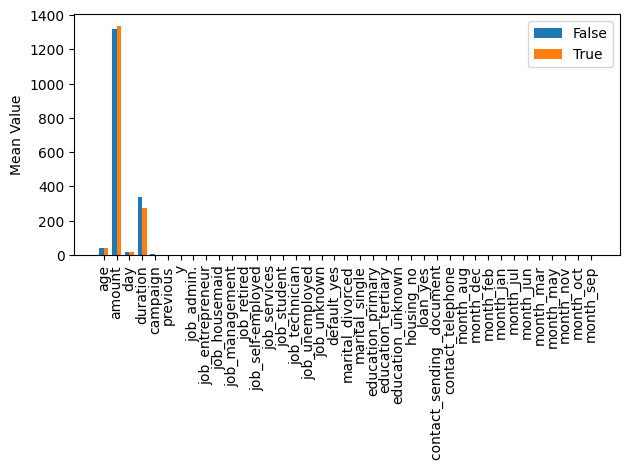

In [28]:
plot_2_bars_by_mean(false_df, true_df)

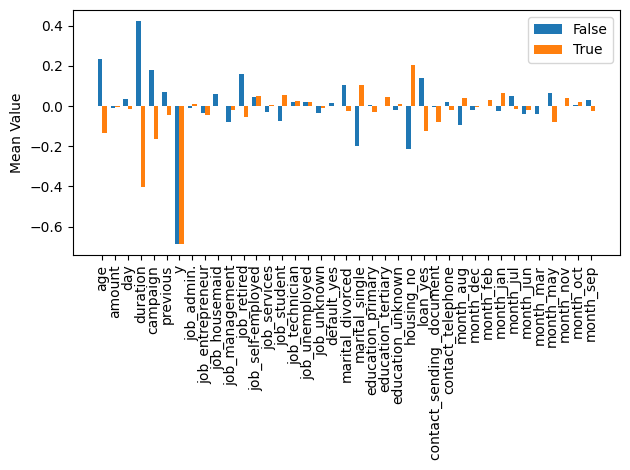

In [29]:
#値にばらつきが大きいので、標準化してもう一度グラフ化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
tmp2 = train_val2.drop(['id'] + str_col_name)
sc_data = sc.fit_transform(tmp2)
sc_df = pl.DataFrame(sc_data, schema=tmp2.columns)
sc_df = pl.concat([train_val2.select(pl.col('id')), sc_df], how='horizontal')

false_df = sc_df.filter(pl.col('id').is_in(false_ids)).drop(['id'])
true_df = sc_df.filter(pl.col('id').is_in(true_ids)).drop(['id'])

plot_2_bars_by_mean(false_df, true_df)

- 青色は誤分類、オレンジは正解のデータ
- durationと housing_yesが大きく異なる
    - 実際はy=0の人で、 durationが大きい人は誤分類しやすい
    - 実際はy=0の人で、 housingが大きい人は誤分類しやすい
- 事前に、durationが大きい人はy=1になりやすいということは分かっているので、「こういう人はy=0になりやすい」という特徴量を見つけ出して、特徴量×durationという特徴量を作って、durationに重み付けをする列を作れば正解率があがるのではないか？ 続きは3部に譲ってここでテストデータ評価を行う

In [30]:
t = train_val2['y']
x = train_val2.drop(str_col_name)
x = x.drop(['id', 'y', 'day'])

model_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=10, class_weight="balanced")
model_tree.fit(x, t)

test2 = nan_fill(test)
t = test2['y']
x = test2.drop(str_col_name)
x = x.drop(['id','y','day'])
model_tree.score(x,t)
print('test_score:', model_tree.score(x, t))

test_score: 0.8149649834131957


- テストデータの正解率は上昇した